In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set(font_scale=1.5, style='ticks')
%load_ext autoreload
%autoreload 2
%matplotlib inline

from spike2calcium_sigmoid_ALS import *

# get cell list information
flist = sorted(glob('GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v01/*.npz'))
cell_info=["_".join(os.path.basename(f).split('_')[:6]) for f in flist]
cell_info_uq = np.unique(cell_info)

cell_info=["_".join(os.path.basename(f).split('_')[:2]) for f in flist]
sensors, sensor_idx = np.unique(cell_info, return_inverse=True)

In [2]:
print(f'number of the cells: {len(cell_info_uq)}')

number of the cells: 171


## Model fit performance

In [3]:
nf = 'sensor_456_subject_478349_cell_9'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v01/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']

In [4]:
n_dat = 1

In [5]:
dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est = sigmoid(ca_est, *param_model[n_dat])
ev = ev_s2f(ca_est, dff_)

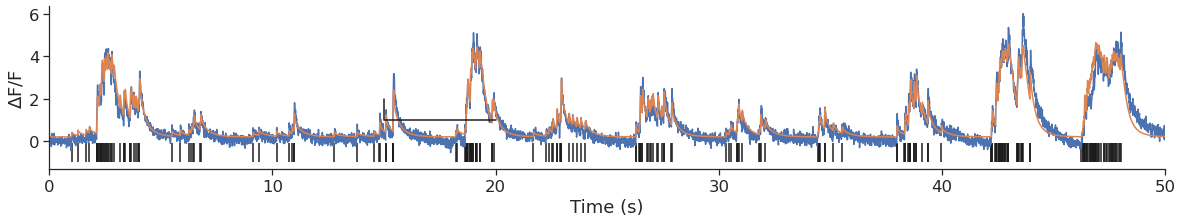

In [6]:
plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat])
plt.plot(ca_times[n_dat], ca_est)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([15, 15, 20], [2, 1, 1], '-k')
plt.xlim([0, 50])
# plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
# plt.savefig('figures/dff_example.pdf')
plt.show()

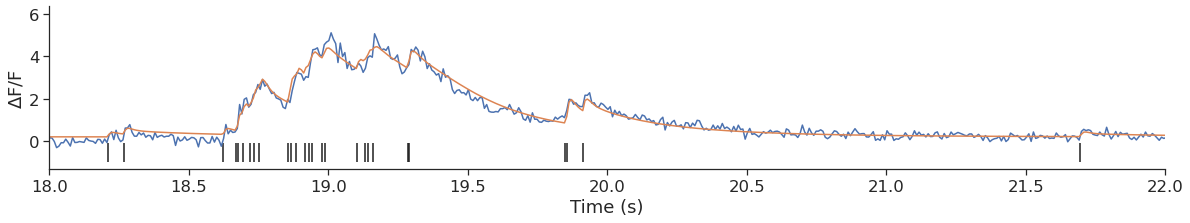

In [7]:
plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat])
plt.plot(ca_times[n_dat], ca_est)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
# plt.plot([15, 15, 20], [2, 1, 1], '-k')
# plt.xlim([0, 50])
plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
# plt.savefig('figures/dff_example_short.pdf')
plt.show()

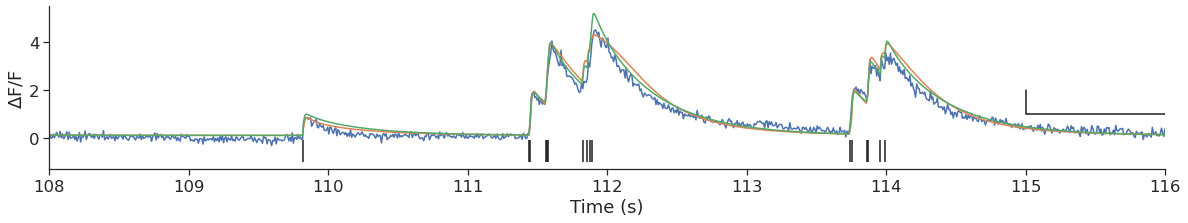

In [70]:
nf = 'sensor_688_subject_479116_cell_4'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']

n_dat = 1

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])


plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat])
plt.plot(ca_times[n_dat], ca_est_sigmoid)
plt.plot(ca_times[n_dat], ca_est_linear)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([115, 115, 116], [2, 1, 1], '-k')
plt.xlim([108, 116])
# plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.savefig('figures/dff_example_linear.pdf')
plt.show()

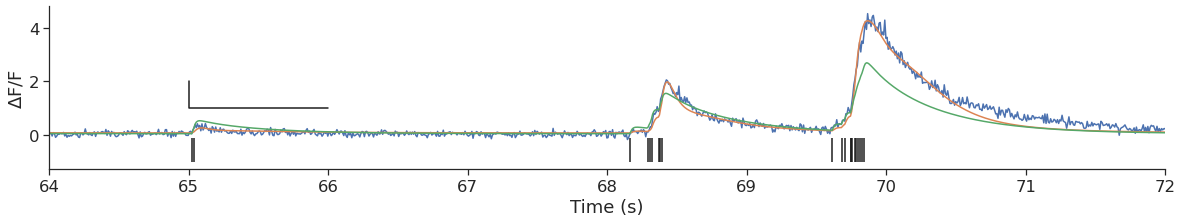

In [54]:
nf = 'sensor_GCaMP7F_subject_478404_cell_3'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']

n_dat = 0

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])


plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat])
plt.plot(ca_times[n_dat], ca_est_sigmoid)
plt.plot(ca_times[n_dat], ca_est_linear)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([65, 65, 66], [2, 1, 1], '-k')
plt.xlim([64, 72])
# plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.savefig('figures/dff_example_sigmoid.pdf')
plt.show()

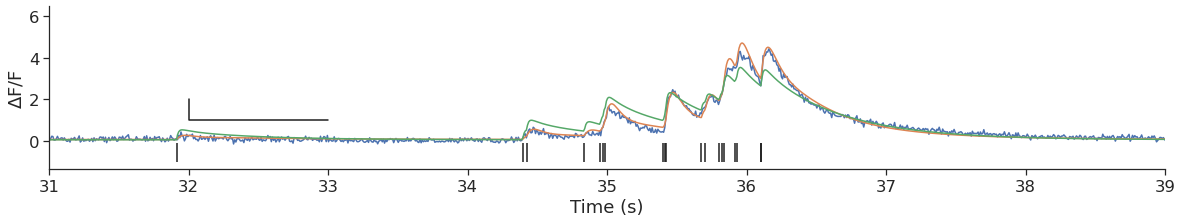

In [79]:
nf = 'sensor_GCaMP7F_subject_471991_cell_6'
f_dff = f'GCaMP8_exported_ROIs_s2f_full/dff_v03/{nf}.npz'
_ = np.load(f_dff, allow_pickle=True)
spike_times = _['spike_times'] # raw fluorescence of the ROI
ca_times = _['ca_times'] # raw fluorescence of the surrounding neuropil, for neuropil subtraction
ca_trace = _['ca_trace'] # frame rate of the movie
cell_type = _['cell_type'] # timing of the action potentials from ephys
spike_times = [_ for _ in spike_times]
ca_times = [_ for _ in ca_times]
ca_trace =[_ for _ in ca_trace]

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_sigmoid_results_v02/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_model = _['param_model']

n_dat = 0

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_sigmoid = sigmoid(ca_est, *param_model[n_dat])

f_fit = f'GCaMP8_exported_ROIs_s2f_full/fit_als_linear_results_v06/{nf}_fit.npz'
_=np.load(f_fit, allow_pickle=True)
param_kernel = _['param_kernel']
param_linear = _['param_linear']

dff_ = ca_trace[n_dat]
ca_est = spike2calcium(spike_times[n_dat], ca_times[n_dat], param_kernel)
ca_est_linear = linear_(ca_est, param_linear[n_dat])


plt.figure(figsize=(20, 3))
plt.plot(ca_times[n_dat], ca_trace[n_dat])
plt.plot(ca_times[n_dat], ca_est_sigmoid)
plt.plot(ca_times[n_dat], ca_est_linear)
plt.vlines(spike_times[n_dat], ymin=-1, ymax=-0.1, colors='k')
plt.plot([32, 32, 33], [2, 1, 1], '-k')
plt.xlim([31, 39])
# plt.xlim([18, 22])
plt.ylabel('$\Delta$F/F')
plt.xlabel('Time (s)')
sns.despine()
plt.savefig('figures/dff_example_slinear.pdf')
plt.show()